In [2]:
import cv2
import numpy as np
import os
import random
import seaborn as sns
from os.path import isfile, join
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Yeni Bölüm

In [3]:
df = pd.read_csv('drive/MyDrive/GlobalAI/labels.csv')
df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [4]:
df.shape


(10222, 2)

In [5]:
df["breed"].nunique()

120

In [6]:
df["breed"].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [7]:
breed_counts = df['breed'].value_counts()
included_breeds = breed_counts[breed_counts > 100].index.tolist()
df = df[df['breed'].isin(included_breeds)].reset_index(drop=True)

In [8]:
df["breed"].nunique()

20

In [9]:
class_names = df['breed'].unique()
class_names

array(['basenji', 'scottish_deerhound', 'maltese_dog', 'cairn',
       'tibetan_terrier', 'shih-tzu', 'australian_terrier', 'samoyed',
       'entlebucher', 'airedale', 'leonberg', 'bernese_mountain_dog',
       'afghan_hound', 'miniature_pinscher', 'irish_wolfhound',
       'great_pyrenees', 'beagle', 'japanese_spaniel', 'pomeranian',
       'blenheim_spaniel'], dtype=object)

In [10]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(df['breed'])
new_labels = to_categorical(label_encoded)

In [11]:
df.head()

id               breed
0  003df8b8a8b05244b1d920bb6cf451f9             basenji
1  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
2  00693b8bc2470375cc744a6391d397ec         maltese_dog
3  00bee065dcec471f26394855c5c2f3de               cairn
4  013f8fdf6d638c7bb042f5f17e8a9fdc     tibetan_terrier

In [12]:
label_encoder

LabelEncoder()

In [13]:
print(label_encoded)

[ 3 17 13 ... 16  1 14]


In [14]:
new_labels.shape

(2184, 20)

In [15]:

def read_and_resize_image_gray(file_path):
    if not os.path.exists(img_path):
      print(f"File not found: {img_path}")
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb_resized = cv2.resize(img_rgb,(64, 64))
    return img_rgb_resized

In [16]:
image_dir = 'drive/MyDrive/GlobalAI/train'

In [17]:
print(os.getcwd())

/content


In [20]:
resized_images = []
for idx, filename in enumerate(df['id']):
    img_path = os.path.join(image_dir, filename + '.jpg')
    print(img_path)
    resized_img = read_and_resize_image_gray(img_path)
    resized_images.append(resized_img)
resized_images_array = np.array(resized_images)

drive/MyDrive/GlobalAI/train/003df8b8a8b05244b1d920bb6cf451f9.jpg
drive/MyDrive/GlobalAI/train/0042188c895a2f14ef64a918ed9c7b64.jpg
drive/MyDrive/GlobalAI/train/00693b8bc2470375cc744a6391d397ec.jpg
drive/MyDrive/GlobalAI/train/00bee065dcec471f26394855c5c2f3de.jpg
drive/MyDrive/GlobalAI/train/013f8fdf6d638c7bb042f5f17e8a9fdc.jpg
drive/MyDrive/GlobalAI/train/0162b3e0144fb1d1ab82fbff3ace9938.jpg
drive/MyDrive/GlobalAI/train/0192d7174233ebdb3d720000413829ac.jpg
drive/MyDrive/GlobalAI/train/01b36cb1b80ab8c3a7d2b7128ad21bdc.jpg
drive/MyDrive/GlobalAI/train/01e787576c003930f96c966f9c3e1d44.jpg
drive/MyDrive/GlobalAI/train/01ee3c7ff9bcaba9874183135877670e.jpg
drive/MyDrive/GlobalAI/train/021b5a49189665c0442c19b5b33e8cf1.jpg
drive/MyDrive/GlobalAI/train/022b34fd8734b39995a9f38a4f3e7b6b.jpg
drive/MyDrive/GlobalAI/train/0267c5f1acbab52ae4a7927e0398612b.jpg
drive/MyDrive/GlobalAI/train/0287b3374c33346e2b41f73af3a36261.jpg
drive/MyDrive/GlobalAI/train/02a8ed20109bd62bd5894f276c08c8a2.jpg
drive/MyDr

In [21]:
X = resized_images_array
y = new_labels

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1747, 64, 64, 3)
(437, 64, 64, 3)
(1747, 20)
(437, 20)


In [24]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [32]:
training_set=train_datagen.flow(X_train,y=y_train,batch_size=64)
testing_set=test_datagen.flow(X_test,y=y_test,batch_size=64)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(64,64,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(20, activation='softmax')

])

In [38]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)       

In [39]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [41]:
history=model.fit_generator(training_set,
                            validation_data = testing_set,
                            epochs = 50,
                            callbacks=[checkpoint, early_stopping])

Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 2.9940 - accuracy: 0.0612
Epoch 1: val_accuracy did not improve from 0.05721
28/28 [==============================] - 29s 1s/step - loss: 2.9940 - accuracy: 0.0612 - val_loss: 2.9984 - val_accuracy: 0.0572
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 2.9943 - accuracy: 0.0504
Epoch 2: val_accuracy did not improve from 0.05721
28/28 [==============================] - 30s 1s/step - loss: 2.9943 - accuracy: 0.0504 - val_loss: 2.9986 - val_accuracy: 0.0572
Epoch 3/50
28/28 [==============================] - ETA: 0s - loss: 2.9947 - accuracy: 0.0572
Epoch 3: val_accuracy did not improve from 0.05721
28/28 [==============================] - 31s 1s/step - loss: 2.9947 - accuracy: 0.0572 - val_loss: 2.9989 - val_accuracy: 0.0389
Epoch 4/50
28/28 [==============================] - ETA: 0s - loss: 2.9945 - accuracy: 0.0595
Epoch 4: val_accuracy did not improve from 0.05721
28/28 [==========================

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

14/14 [==============================] - 2s 101ms/step - loss: 111.0713 - accuracy: 0.1350
Test Accuracy: 13.50%
Test Loss: 111.0713


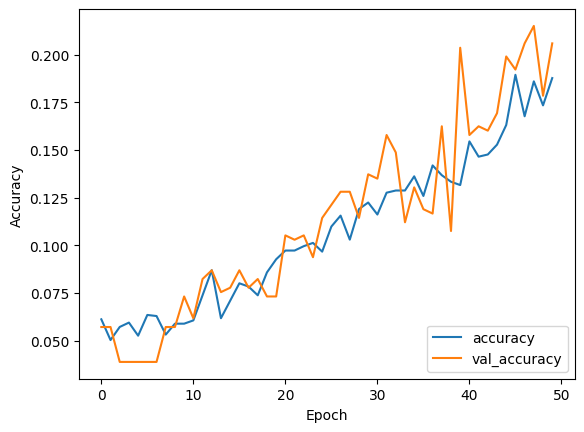

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

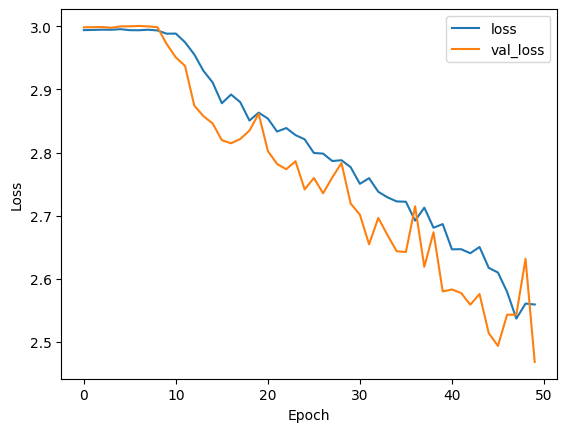

In [44]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [45]:
best_model = load_model('best_model.h5')

In [46]:
imgpath = glob("drive/MyDrive/GlobalAI/test/*jpg")

In [47]:
imgpath15 = imgpath[:15]
print(len(imgpath15))

15


In [48]:
resized_images_test = []
for filename in (imgpath15):
    resized_img = read_and_resize_image_gray(filename)
    resized_images_test.append(resized_img)
resized_images_test = np.array(resized_images_test)

In [49]:

resized_images_test.shape
len(imgpath15)

15

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 0
(64, 64, 3)
1/1 [==============================] - 1s 570ms/step


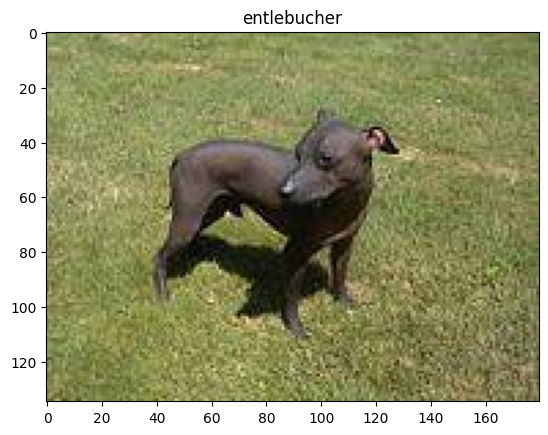

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 1
(64, 64, 3)
1/1 [==============================] - 0s 56ms/step


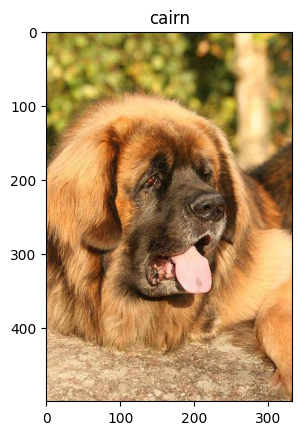

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 2
(64, 64, 3)
1/1 [==============================] - 0s 33ms/step


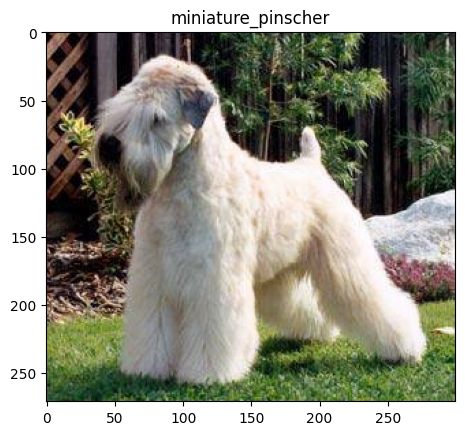

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 3
(64, 64, 3)
1/1 [==============================] - 0s 43ms/step


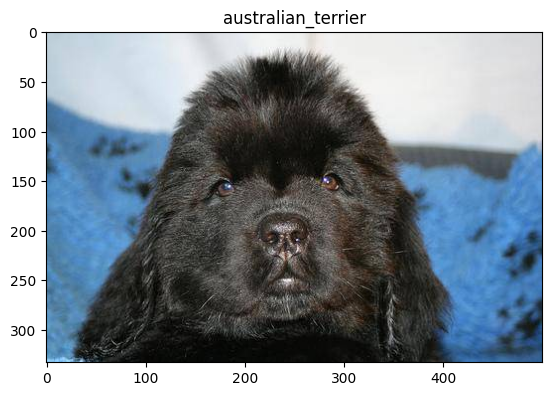

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 4
(64, 64, 3)
1/1 [==============================] - 0s 31ms/step


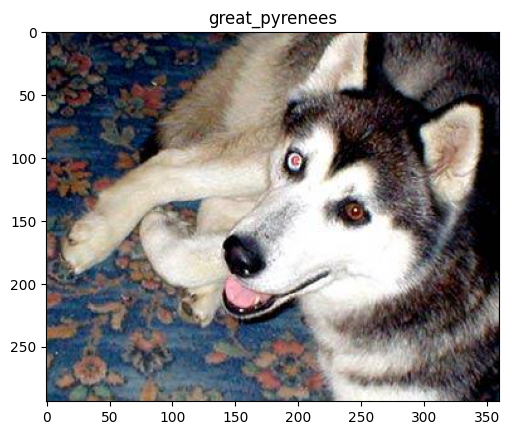

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 5
(64, 64, 3)
1/1 [==============================] - 0s 56ms/step


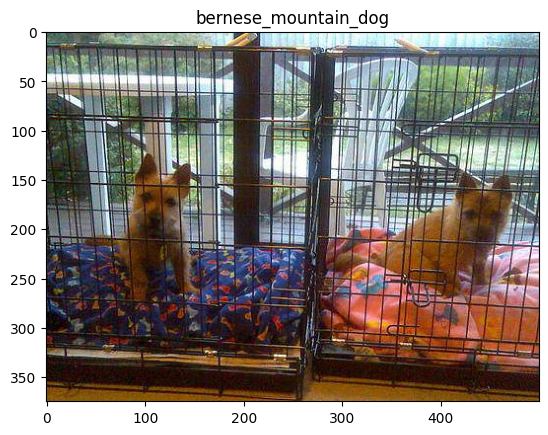

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 6
(64, 64, 3)
1/1 [==============================] - 0s 41ms/step


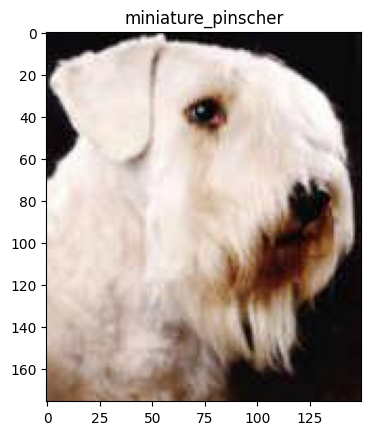

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 7
(64, 64, 3)
1/1 [==============================] - 0s 27ms/step


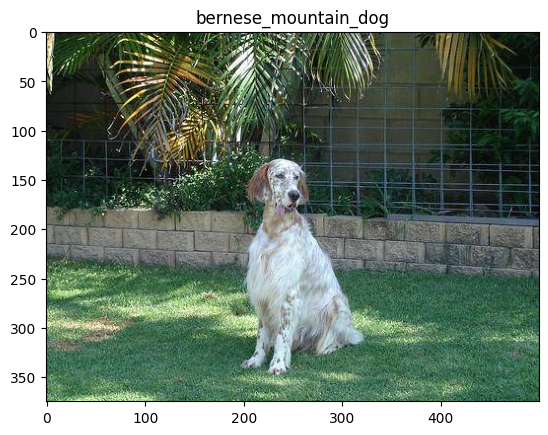

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 8
(64, 64, 3)
1/1 [==============================] - 0s 46ms/step


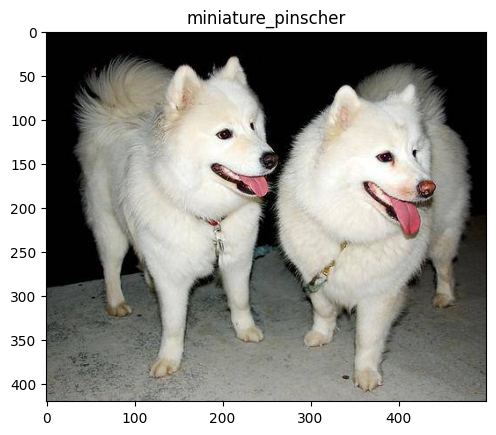

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 9
(64, 64, 3)
1/1 [==============================] - 0s 80ms/step


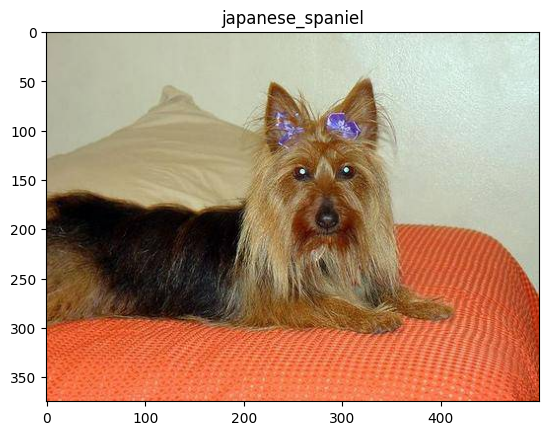

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 10
(64, 64, 3)
1/1 [==============================] - 0s 55ms/step


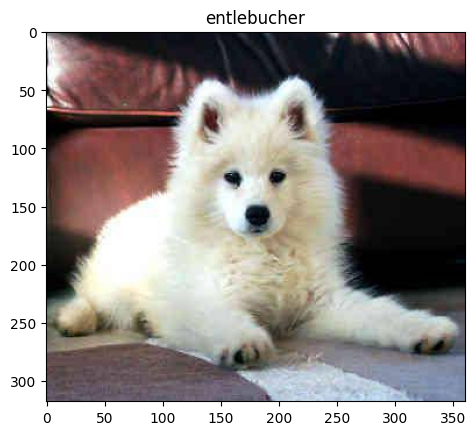

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 11
(64, 64, 3)
1/1 [==============================] - 0s 53ms/step


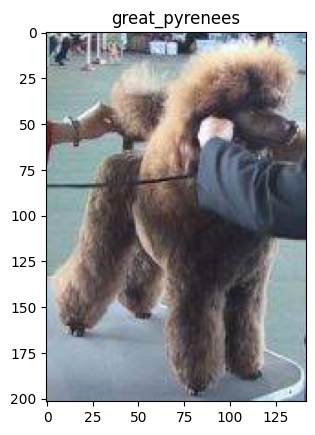

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 12
(64, 64, 3)
1/1 [==============================] - 0s 46ms/step


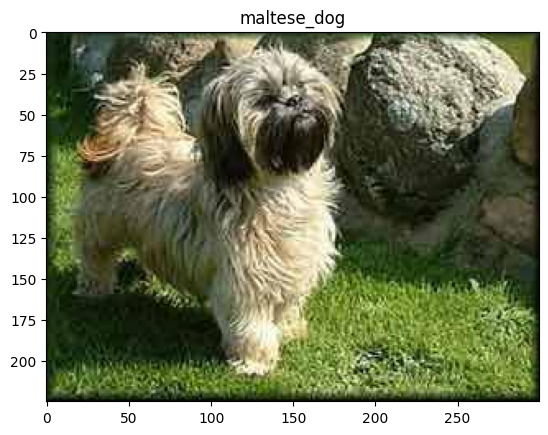

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 13
(64, 64, 3)
1/1 [==============================] - 0s 47ms/step


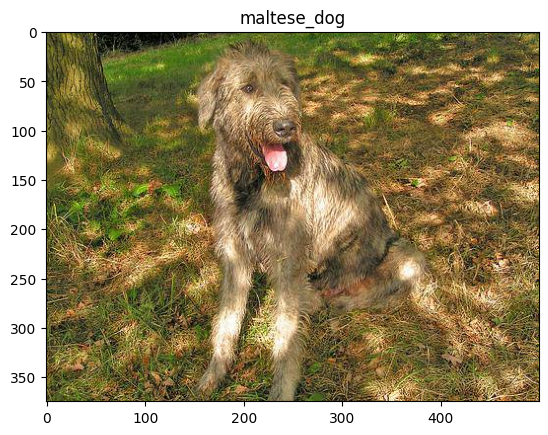

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 14
(64, 64, 3)
1/1 [==============================] - 0s 55ms/step


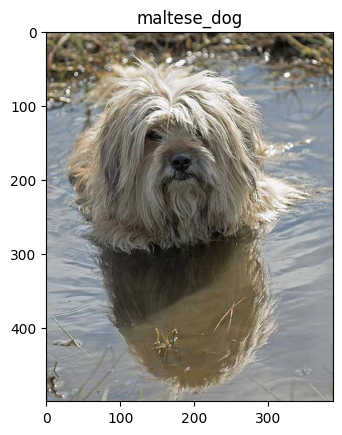

filename = drive/MyDrive/GlobalAI/test/0069b1cc4546fc98f84f981bf9a0696a.jpg, idx = 15


IndexError: ignored

In [51]:

for idx, imge in enumerate(resized_images_array):
        # Load the image to classify
        filename= imgpath15[counter]
        print(f"filename = {filename}, idx = {idx}")
        org_img = cv2.imread(imgpath15[idx])
        org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)

        print(imge.shape)

        pred_img = imge.reshape(-1, 64, 64, 3)
        # Predict the class of the image
        predictions = best_model.predict(pred_img)

        # Get the class with the highest probability
        bird_class = predictions.argmax()

        plt.imshow(org_img)
        plt.title(class_names[bird_class])
        plt.show()